In [1]:
import pandas as pd

url = "/Users/alexkabanovsky/Downloads/pres_pollaverages_1968-2016.csv"
df = pd.read_csv(url)

In [2]:
df.drop(columns = ['_nat_shortpoly_combpoly_weight', '_shortpoly_combpoly_weight','_nonlinear_polynomial_degree', '_attenuate_endpoints', '_out_of_state_house_discount','_state_trendline_weight','_state_houseeffects_weight', '_numloops', '_defaultbasetime','_minpoints'],  axis =1, inplace=True)

In [3]:
df.drop(columns = ['_medpoly2', 'trend_medpoly2','_shortpoly0', 'trend_shortpoly0', 'sum_weight_medium', 'sum_weight_short', 'sum_influence', 'sum_nat_influence','_house_effects_multiplier'],  axis =1, inplace=True)

In [4]:
df.drop(['timestamp','comment', 'last_enddate'],  axis =1, inplace=True)
df

,cycle,state,modeldate,candidate_name,candidate_id,pct_estimate,pct_trend_adjusted,election_date,election_qdate,last_qdate
0,2016,Alabama,3/3/2016,Donald Trump,9849,70.11138,68.63747,11/8/2016,448,66
1,2016,Alaska,3/3/2016,Donald Trump,9849,51.63014,49.68174,11/8/2016,448,63
2,2016,Arizona,3/3/2016,Donald Trump,9849,44.00000,41.02212,11/8/2016,448,30
3,2016,Colorado,3/3/2016,Donald Trump,9849,45.95150,43.51193,11/8/2016,448,113
4,2016,Florida,3/3/2016,Donald Trump,9849,46.54603,44.68674,11/8/2016,448,110
...,...,...,...,...,...,...,...,...,...,...
217468,1968,National,11/4/1968,"Hubert Humphrey, Jr.",680002,39.06675,40.46579,11/5/1968,407,402
217469,1968,National,11/4/1968,Richard M. Nixon,680001,47.72081,47.83623,11/5/1968,407,402
217470,1968,National,11/5/1968,George Wallace,680003,15.00200,14.39688,11/5/1968,407,402
217471,1968,National,11/5/1968,"Hubert Humphrey, Jr.",680002,39.06675,40.46579,11/5/1968,407,402


In [5]:
import datetime as dt
df['modeldate'] = pd.to_datetime(df['modeldate'])
start_date = dt.datetime(2016, 7, 1)
end_date = dt.datetime(2016, 11, 9)

index_names = df[(df['modeldate'] < start_date) | (df['modeldate'] > end_date)].index
  
df.drop(index_names, inplace = True)
df.dropna(how="any", inplace=True)
df

,cycle,state,modeldate,candidate_name,candidate_id,pct_estimate,pct_trend_adjusted,election_date,election_qdate,last_qdate
9392,2016,Alaska,2016-07-01,Gary Johnson,9459,15.050810,14.386830,11/8/2016,448,244
9393,2016,Arizona,2016-07-01,Gary Johnson,9459,7.272027,7.246434,11/8/2016,448,242
9394,2016,Arkansas,2016-07-01,Gary Johnson,9459,8.005040,7.681001,11/8/2016,448,247
9395,2016,California,2016-07-01,Gary Johnson,9459,4.463887,4.363229,11/8/2016,448,236
9396,2016,Colorado,2016-07-01,Gary Johnson,9459,4.171414,4.000523,11/8/2016,448,249
...,...,...,...,...,...,...,...,...,...,...
28549,2016,Virginia,2016-11-08,Hillary Rodham Clinton,9207,47.267190,47.285300,11/8/2016,448,444
28550,2016,Washington,2016-11-08,Hillary Rodham Clinton,9207,50.271080,50.272250,11/8/2016,448,445
28551,2016,West Virginia,2016-11-08,Hillary Rodham Clinton,9207,28.617830,28.594330,11/8/2016,448,444
28552,2016,Wisconsin,2016-11-08,Hillary Rodham Clinton,9207,46.565560,46.594750,11/8/2016,448,445


In [6]:
swing_states = ["Arizona", "Georgia", "Michigan", "Nevada", "North Carolina", "Pennsylvania", "Wisconsin"]

In [7]:
large_states = ["California", "Texas"]

In [8]:
individual_swing_states = ["Pennsylvania", "Wisconsin"]

In [9]:
individual_swing_states2 = ["Georgia", "Nevada"]

In [10]:
df.loc[:,['state', 'candidate_name', 'pct_estimate']]
df

,cycle,state,modeldate,candidate_name,candidate_id,pct_estimate,pct_trend_adjusted,election_date,election_qdate,last_qdate
9392,2016,Alaska,2016-07-01,Gary Johnson,9459,15.050810,14.386830,11/8/2016,448,244
9393,2016,Arizona,2016-07-01,Gary Johnson,9459,7.272027,7.246434,11/8/2016,448,242
9394,2016,Arkansas,2016-07-01,Gary Johnson,9459,8.005040,7.681001,11/8/2016,448,247
9395,2016,California,2016-07-01,Gary Johnson,9459,4.463887,4.363229,11/8/2016,448,236
9396,2016,Colorado,2016-07-01,Gary Johnson,9459,4.171414,4.000523,11/8/2016,448,249
...,...,...,...,...,...,...,...,...,...,...
28549,2016,Virginia,2016-11-08,Hillary Rodham Clinton,9207,47.267190,47.285300,11/8/2016,448,444
28550,2016,Washington,2016-11-08,Hillary Rodham Clinton,9207,50.271080,50.272250,11/8/2016,448,445
28551,2016,West Virginia,2016-11-08,Hillary Rodham Clinton,9207,28.617830,28.594330,11/8/2016,448,444
28552,2016,Wisconsin,2016-11-08,Hillary Rodham Clinton,9207,46.565560,46.594750,11/8/2016,448,445


In [11]:
df.drop(['cycle','candidate_id', 'election_date', 'election_qdate',	'last_qdate'],  axis =1, inplace=True)
df

,state,modeldate,candidate_name,pct_estimate,pct_trend_adjusted
9392,Alaska,2016-07-01,Gary Johnson,15.050810,14.386830
9393,Arizona,2016-07-01,Gary Johnson,7.272027,7.246434
9394,Arkansas,2016-07-01,Gary Johnson,8.005040,7.681001
9395,California,2016-07-01,Gary Johnson,4.463887,4.363229
9396,Colorado,2016-07-01,Gary Johnson,4.171414,4.000523
...,...,...,...,...,...
28549,Virginia,2016-11-08,Hillary Rodham Clinton,47.267190,47.285300
28550,Washington,2016-11-08,Hillary Rodham Clinton,50.271080,50.272250
28551,West Virginia,2016-11-08,Hillary Rodham Clinton,28.617830,28.594330
28552,Wisconsin,2016-11-08,Hillary Rodham Clinton,46.565560,46.594750


In [12]:
df = df[df['candidate_name'] != 'Gary Johnson']
df

,state,modeldate,candidate_name,pct_estimate,pct_trend_adjusted
9418,Alabama,2016-07-01,Donald Trump,70.05815,67.22025
9419,Alaska,2016-07-01,Donald Trump,45.95880,44.55957
9420,Arizona,2016-07-01,Donald Trump,41.87172,41.24359
9421,Arkansas,2016-07-01,Donald Trump,47.00000,47.36731
9422,California,2016-07-01,Donald Trump,33.19515,31.96065
...,...,...,...,...,...
28549,Virginia,2016-11-08,Hillary Rodham Clinton,47.26719,47.28530
28550,Washington,2016-11-08,Hillary Rodham Clinton,50.27108,50.27225
28551,West Virginia,2016-11-08,Hillary Rodham Clinton,28.61783,28.59433
28552,Wisconsin,2016-11-08,Hillary Rodham Clinton,46.56556,46.59475


In [13]:
filtered_df = df[df['state'].isin(large_states)]
filtered_df

,state,modeldate,candidate_name,pct_estimate,pct_trend_adjusted
9422,California,2016-07-01,Donald Trump,33.19515,31.96065
9456,Texas,2016-07-01,Donald Trump,42.45778,42.11520
9467,California,2016-07-01,Hillary Rodham Clinton,52.61412,52.88642
9501,Texas,2016-07-01,Hillary Rodham Clinton,35.91338,34.99324
9538,California,2016-07-02,Donald Trump,32.20488,30.94666
...,...,...,...,...,...
28377,Texas,2016-11-07,Hillary Rodham Clinton,38.62470,38.58099
28444,California,2016-11-08,Donald Trump,32.83490,32.96150
28489,Texas,2016-11-08,Donald Trump,48.32655,48.41615
28501,California,2016-11-08,Hillary Rodham Clinton,54.91905,54.90748


In [14]:
name = df['state'].unique()
print(name)

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Florida' 'Georgia' 'Idaho' 'Illinois' 'Indiana' 'Iowa'
 'Kansas' 'Louisiana' 'ME-1' 'ME-2' 'Maine' 'Maryland' 'Massachusetts'
 'Michigan' 'Minnesota' 'Mississippi' 'Missouri' 'Montana' 'National'
 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico' 'New York'
 'North Carolina' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'South Carolina' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Kentucky' 'Delaware' 'Hawaii'
 'Nebraska' 'North Dakota' 'Rhode Island' 'South Dakota' 'Wyoming' 'NE-1'
 'NE-2' 'NE-3' 'District of Columbia']


In [15]:
state = df['state'].nunique()
print(state)

57


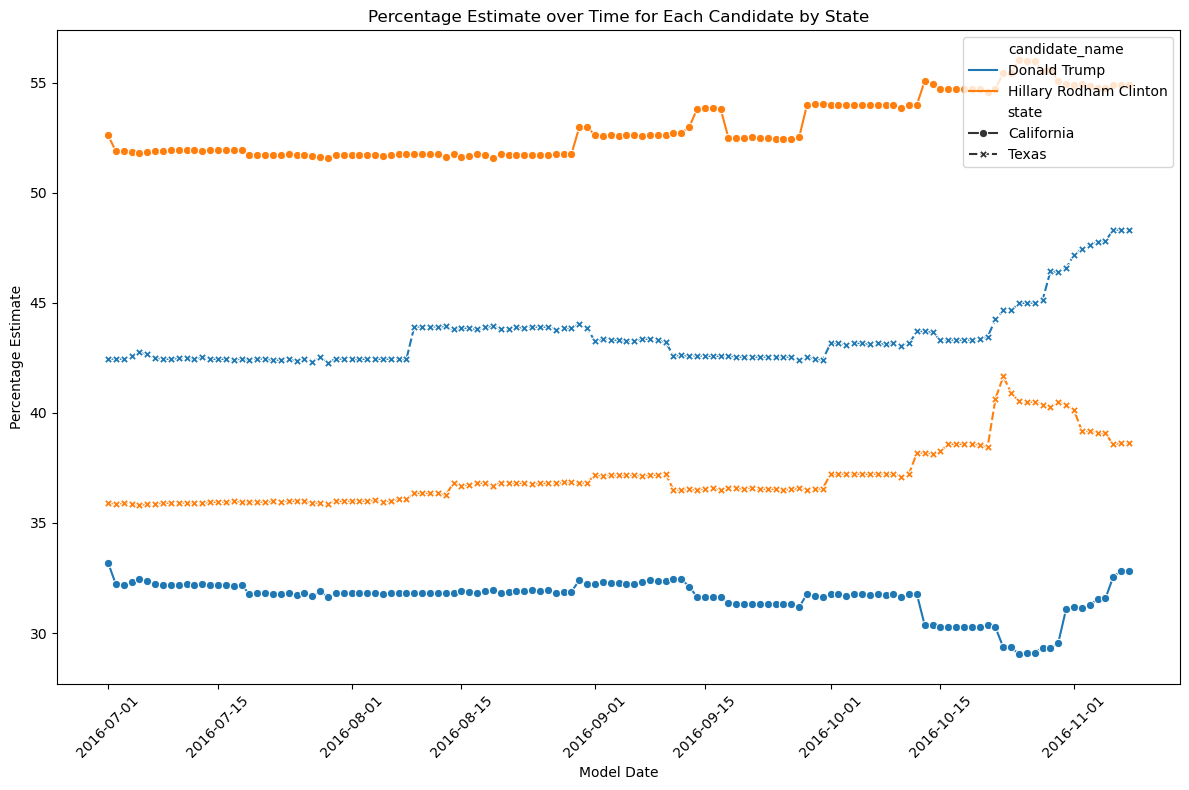

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.lineplot(data=filtered_df, x='modeldate', y='pct_estimate', hue='candidate_name', style='state', markers=True)

plt.xlabel('Model Date')
plt.ylabel('Percentage Estimate')
plt.title('Percentage Estimate over Time for Each Candidate by State')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [17]:
filtered_df2 = df[df['state'].isin(swing_states)]

In [18]:
individual = df[df['state'].isin(individual_swing_states)]

In [19]:
individual2 = df[df['state'].isin(individual_swing_states2)]

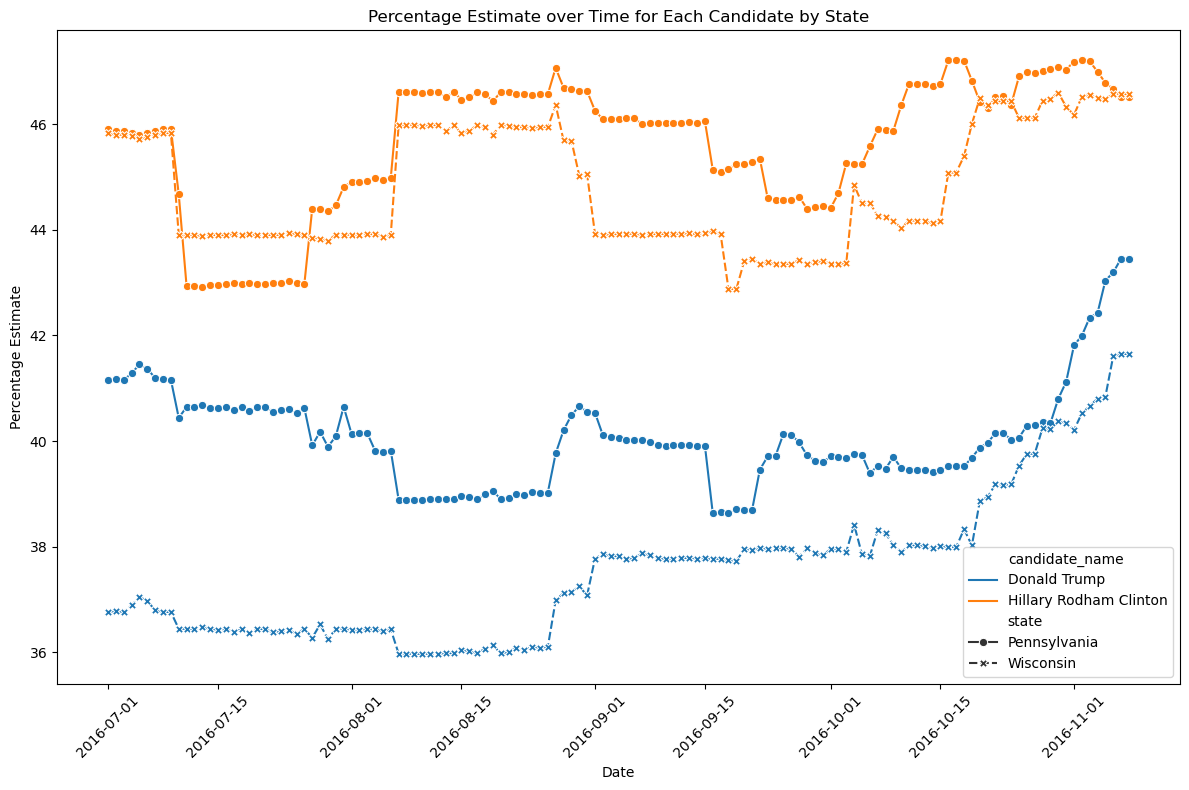

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.lineplot(data=individual, x='modeldate', y='pct_estimate', hue='candidate_name', style='state', markers=True)

plt.xlabel('Date')
plt.ylabel('Percentage Estimate')
plt.title('Percentage Estimate over Time for Each Candidate by State')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

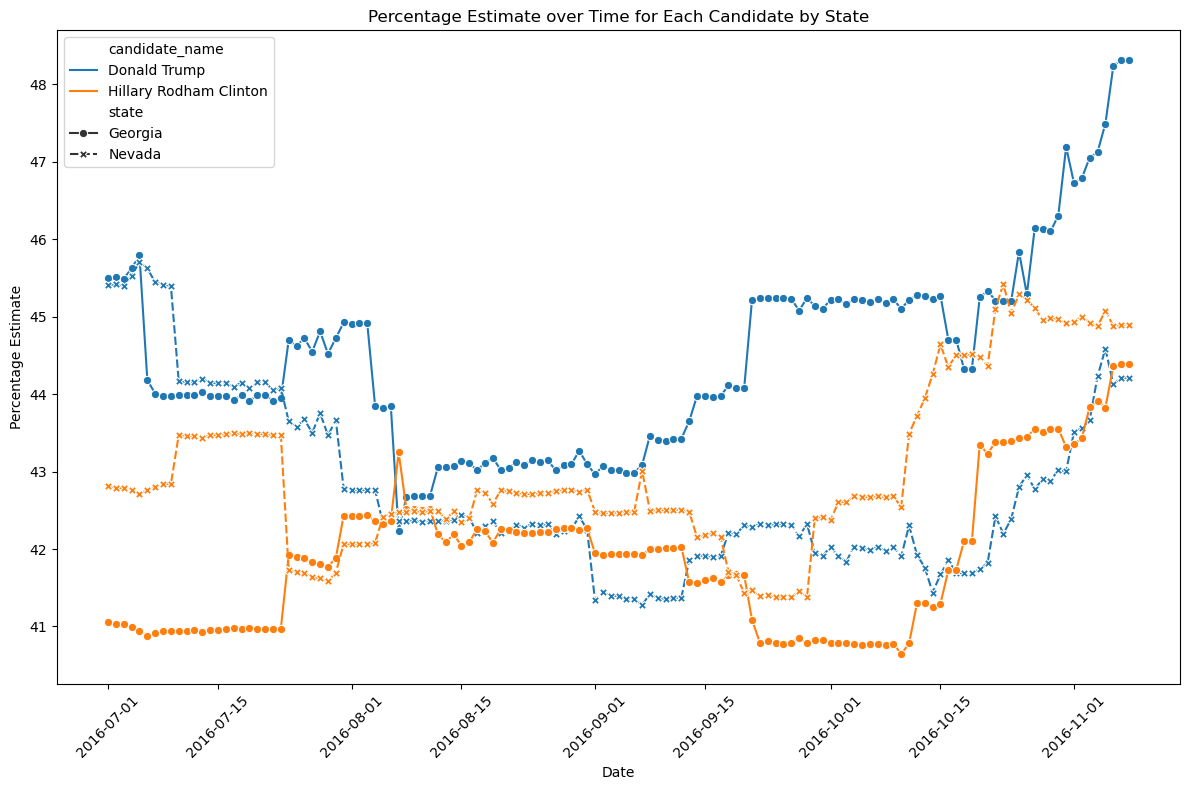

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.lineplot(data=individual2, x='modeldate', y='pct_estimate', hue='candidate_name', style='state', markers=True)

plt.xlabel('Date')
plt.ylabel('Percentage Estimate')
plt.title('Percentage Estimate over Time for Each Candidate by State')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [22]:
#Scott Walker is a nice guy, but not presidential material. 
#Wisconsin is in turmoil, borrowing to the hilt, and doing poorly in jobs etc. - 26 July 2015 

In [23]:

url = "/Users/alexkabanovsky/Downloads/presidential_poll_averages_2020.csv"
df2020 = pd.read_csv(url)
df2020


,cycle,state,modeldate,candidate_name,pct_estimate,pct_trend_adjusted
0,2020,Wyoming,11/3/2020,Joseph R. Biden Jr.,30.81486,30.82599
1,2020,Wisconsin,11/3/2020,Joseph R. Biden Jr.,52.12642,52.09584
2,2020,West Virginia,11/3/2020,Joseph R. Biden Jr.,33.49125,33.51517
3,2020,Washington,11/3/2020,Joseph R. Biden Jr.,59.34201,59.39408
4,2020,Virginia,11/3/2020,Joseph R. Biden Jr.,53.74120,53.72101
...,...,...,...,...,...,...
29080,2020,Connecticut,2/27/2020,Donald Trump,33.66370,34.58325
29081,2020,Colorado,2/27/2020,Donald Trump,44.27899,44.07662
29082,2020,California,2/27/2020,Donald Trump,34.66504,34.69761
29083,2020,Arizona,2/27/2020,Donald Trump,47.79450,48.07208


In [24]:
df2020.drop(['cycle'],  axis =1, inplace=True)
df2020


,state,modeldate,candidate_name,pct_estimate,pct_trend_adjusted
0,Wyoming,11/3/2020,Joseph R. Biden Jr.,30.81486,30.82599
1,Wisconsin,11/3/2020,Joseph R. Biden Jr.,52.12642,52.09584
2,West Virginia,11/3/2020,Joseph R. Biden Jr.,33.49125,33.51517
3,Washington,11/3/2020,Joseph R. Biden Jr.,59.34201,59.39408
4,Virginia,11/3/2020,Joseph R. Biden Jr.,53.74120,53.72101
...,...,...,...,...,...
29080,Connecticut,2/27/2020,Donald Trump,33.66370,34.58325
29081,Colorado,2/27/2020,Donald Trump,44.27899,44.07662
29082,California,2/27/2020,Donald Trump,34.66504,34.69761
29083,Arizona,2/27/2020,Donald Trump,47.79450,48.07208


In [25]:
import datetime as dt
df2020['modeldate'] = pd.to_datetime(df2020['modeldate'])
start_date = dt.datetime(2020, 7, 1)
end_date = dt.datetime(2020, 11, 3)

index_names = df2020[(df2020['modeldate'] < start_date) | (df2020['modeldate'] > end_date)].index
  
df2020.drop(index_names, inplace = True)
df2020.dropna(how="any", inplace=True)
df2020

,state,modeldate,candidate_name,pct_estimate,pct_trend_adjusted
0,Wyoming,2020-11-03,Joseph R. Biden Jr.,30.81486,30.82599
1,Wisconsin,2020-11-03,Joseph R. Biden Jr.,52.12642,52.09584
2,West Virginia,2020-11-03,Joseph R. Biden Jr.,33.49125,33.51517
3,Washington,2020-11-03,Joseph R. Biden Jr.,59.34201,59.39408
4,Virginia,2020-11-03,Joseph R. Biden Jr.,53.74120,53.72101
...,...,...,...,...,...
19784,Colorado,2020-07-01,Donald Trump,39.23602,37.92071
19785,California,2020-07-01,Donald Trump,33.08887,31.54198
19786,Arkansas,2020-07-01,Donald Trump,47.01842,46.86518
19787,Arizona,2020-07-01,Donald Trump,44.51127,44.29824


In [26]:
df2020 = df2020[df2020['candidate_name'] != 'Convention Bounce for Joseph R. Biden Jr.']
df2020
df2020 = df2020[df2020['candidate_name'] != 'Convention Bounce for Donald Trump']
df2020

,state,modeldate,candidate_name,pct_estimate,pct_trend_adjusted
0,Wyoming,2020-11-03,Joseph R. Biden Jr.,30.81486,30.82599
1,Wisconsin,2020-11-03,Joseph R. Biden Jr.,52.12642,52.09584
2,West Virginia,2020-11-03,Joseph R. Biden Jr.,33.49125,33.51517
3,Washington,2020-11-03,Joseph R. Biden Jr.,59.34201,59.39408
4,Virginia,2020-11-03,Joseph R. Biden Jr.,53.74120,53.72101
...,...,...,...,...,...
19784,Colorado,2020-07-01,Donald Trump,39.23602,37.92071
19785,California,2020-07-01,Donald Trump,33.08887,31.54198
19786,Arkansas,2020-07-01,Donald Trump,47.01842,46.86518
19787,Arizona,2020-07-01,Donald Trump,44.51127,44.29824


In [27]:
df2020['modeldate'] = pd.to_datetime(df2020['modeldate'])
sorted_df2020=df2020.sort_values(by='modeldate', ascending=True)

sorted_df2020

,state,modeldate,candidate_name,pct_estimate,pct_trend_adjusted
19788,Alabama,2020-07-01,Donald Trump,56.40528,54.78703
19728,Missouri,2020-07-01,Joseph R. Biden Jr.,44.52657,45.12057
19729,Mississippi,2020-07-01,Joseph R. Biden Jr.,40.45329,41.06105
19730,Minnesota,2020-07-01,Joseph R. Biden Jr.,53.60623,54.36530
19731,Michigan,2020-07-01,Joseph R. Biden Jr.,49.88876,50.15809
...,...,...,...,...,...
80,National,2020-11-03,Donald Trump,43.39262,43.40869
81,NE-2,2020-11-03,Donald Trump,46.08874,46.21062
82,NE-1,2020-11-03,Donald Trump,49.43981,50.75042
56,Wyoming,2020-11-03,Donald Trump,61.97429,62.31048


In [28]:
large_states = ["California", "Texas"]

In [29]:
filtered_2020 = df2020[df2020['state'].isin(large_states)]
filtered_2020 = filtered_2020.sort_values(by='modeldate', ascending=True)
filtered_2020

,state,modeldate,candidate_name,pct_estimate,pct_trend_adjusted
19785,California,2020-07-01,Donald Trump,33.08887,31.54198
19712,Texas,2020-07-01,Joseph R. Biden Jr.,45.71981,46.53586
19753,Texas,2020-07-01,Donald Trump,47.65641,46.81166
19744,California,2020-07-01,Joseph R. Biden Jr.,60.31712,61.24839
19630,Texas,2020-07-02,Joseph R. Biden Jr.,45.78147,46.16228
...,...,...,...,...,...
231,Texas,2020-11-02,Joseph R. Biden Jr.,47.46643,47.44781
107,California,2020-11-03,Donald Trump,32.28521,32.43615
63,Texas,2020-11-03,Donald Trump,48.57118,48.58794
51,California,2020-11-03,Joseph R. Biden Jr.,61.62906,61.62459


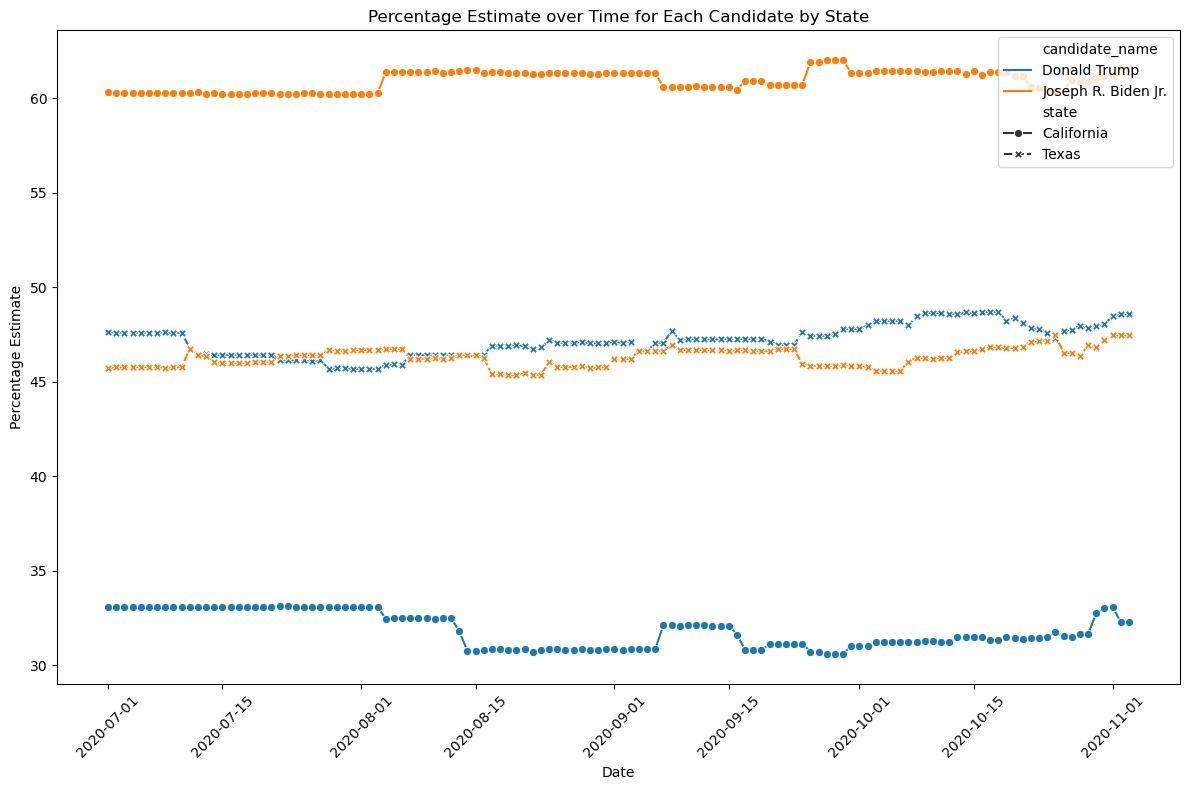

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

color=['red', 'blue']
plt.figure(figsize=(12, 8))
sns.lineplot(data=filtered_2020, x='modeldate', y='pct_estimate', hue='candidate_name', style='state', markers=True)

plt.xlabel('Date')
plt.ylabel('Percentage Estimate')
plt.title('Percentage Estimate over Time for Each Candidate by State')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [31]:
swing_states2020 = ["Arizona", "Georgia", "Michigan", "Nevada", "North Carolina", "Pennsylvania", "Wisconsin"]

In [32]:
individual_swing_states2020 = ["Pennsylvania", "Wisconsin"]

In [33]:
individual_swing_states2_2020 = ["Georgia", "Nevada"]

In [34]:
individual_2020 = df2020[df2020['state'].isin(individual_swing_states2020)]
individual_2020

,state,modeldate,candidate_name,pct_estimate,pct_trend_adjusted
1,Wisconsin,2020-11-03,Joseph R. Biden Jr.,52.12642,52.09584
12,Pennsylvania,2020-11-03,Joseph R. Biden Jr.,50.22000,50.20422
57,Wisconsin,2020-11-03,Donald Trump,43.66555,43.70826
68,Pennsylvania,2020-11-03,Donald Trump,45.57216,45.55034
225,Wisconsin,2020-11-02,Joseph R. Biden Jr.,52.12642,52.09584
...,...,...,...,...,...
19674,Pennsylvania,2020-07-02,Donald Trump,42.10975,42.03214
19707,Wisconsin,2020-07-01,Joseph R. Biden Jr.,49.51540,49.68030
19715,Pennsylvania,2020-07-01,Joseph R. Biden Jr.,49.89835,50.04434
19748,Wisconsin,2020-07-01,Donald Trump,41.64600,41.55227


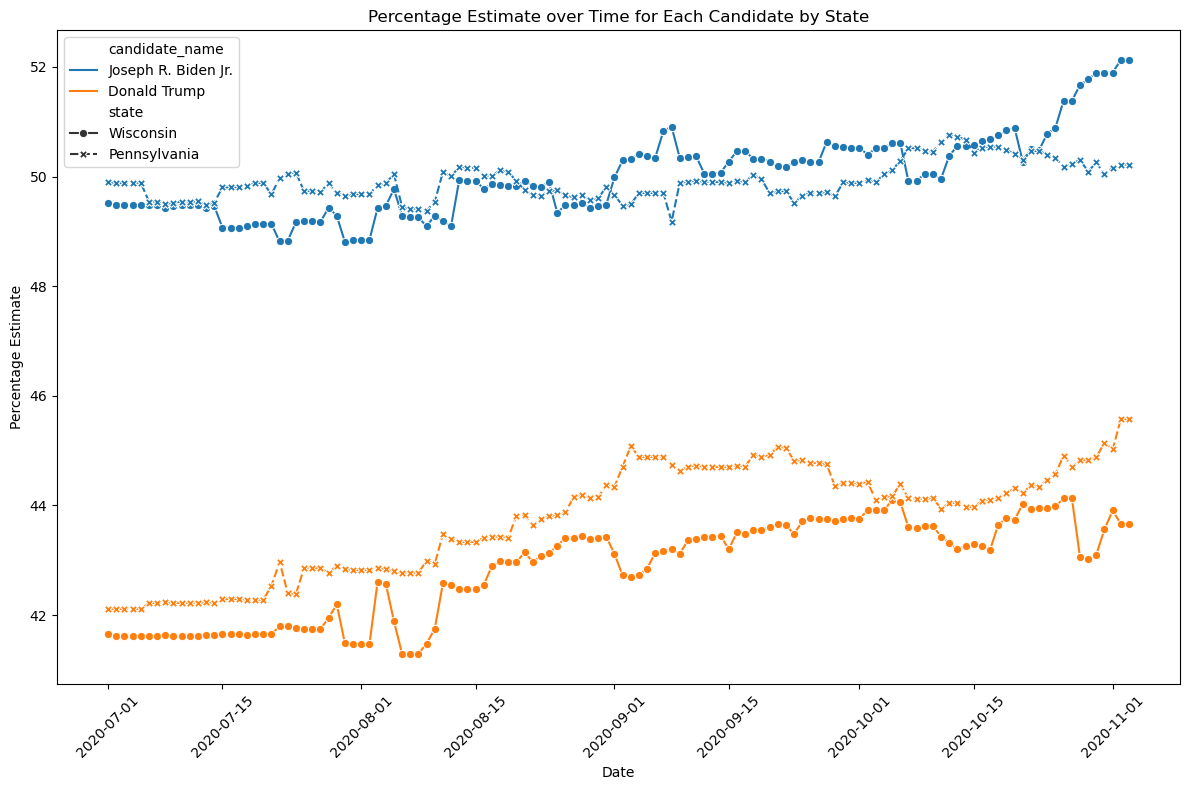

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.lineplot(data=individual_2020, x='modeldate', y='pct_estimate', hue='candidate_name', style='state', markers=True)

plt.xlabel('Date')
plt.ylabel('Percentage Estimate')
plt.title('Percentage Estimate over Time for Each Candidate by State')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [36]:
individual2_2020 = df2020[df2020['state'].isin(individual_swing_states2_2020)]
individual2_2020

,state,modeldate,candidate_name,pct_estimate,pct_trend_adjusted
22,Nevada,2020-11-03,Joseph R. Biden Jr.,49.62386,49.65657
45,Georgia,2020-11-03,Joseph R. Biden Jr.,48.57144,48.54042
78,Nevada,2020-11-03,Donald Trump,44.32982,44.36094
101,Georgia,2020-11-03,Donald Trump,47.32513,47.36694
246,Nevada,2020-11-02,Joseph R. Biden Jr.,49.62386,49.65657
...,...,...,...,...,...
19698,Georgia,2020-07-02,Donald Trump,46.51533,45.96539
19724,Nevada,2020-07-01,Joseph R. Biden Jr.,47.57804,48.64771
19739,Georgia,2020-07-01,Joseph R. Biden Jr.,47.10328,47.68720
19765,Nevada,2020-07-01,Donald Trump,42.35963,40.02983


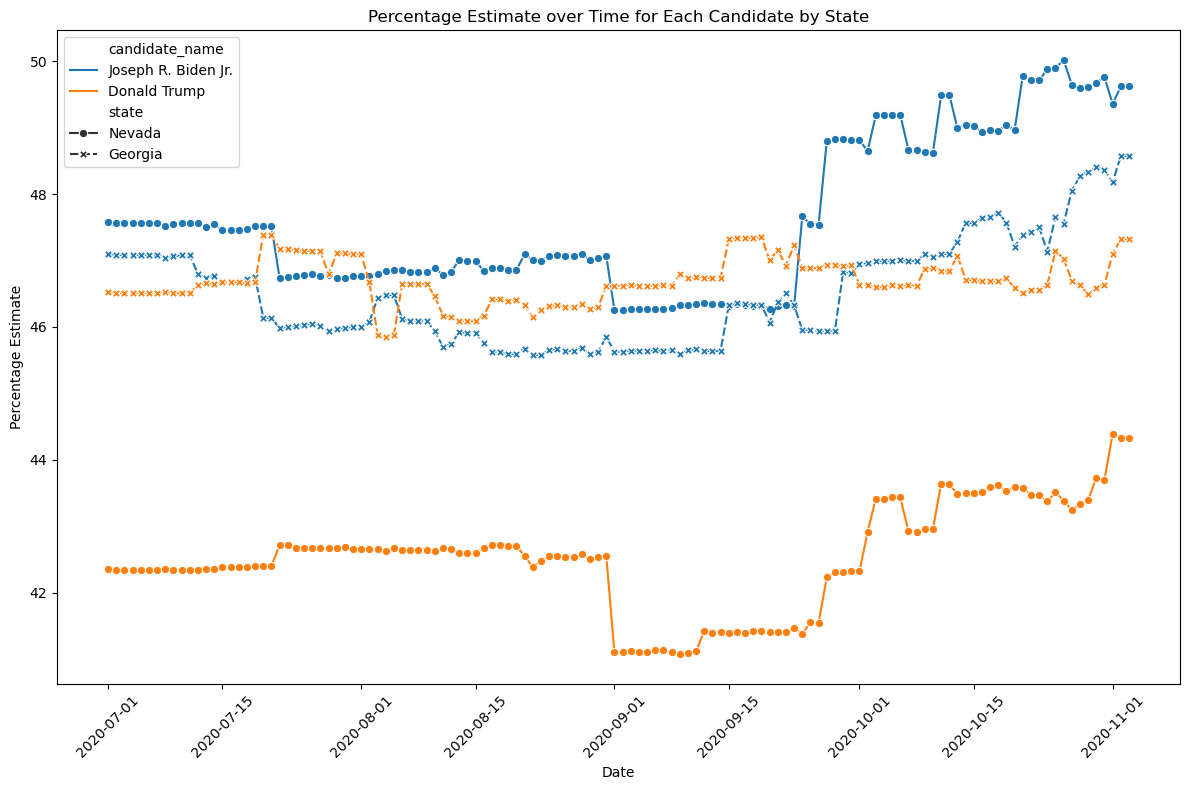

In [37]:
plt.figure(figsize=(12, 8))

sns.lineplot(individual2_2020, x='modeldate', y='pct_estimate', hue='candidate_name', style='state', markers=True)

plt.xlabel('Date')
plt.ylabel('Percentage Estimate')
plt.title('Percentage Estimate over Time for Each Candidate by State')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [38]:
national_df = df[df['state'] == 'National']

In [39]:
filtered_df = df[df['state'].isin(large_states)]
filtered_df

,state,modeldate,candidate_name,pct_estimate,pct_trend_adjusted
9422,California,2016-07-01,Donald Trump,33.19515,31.96065
9456,Texas,2016-07-01,Donald Trump,42.45778,42.11520
9467,California,2016-07-01,Hillary Rodham Clinton,52.61412,52.88642
9501,Texas,2016-07-01,Hillary Rodham Clinton,35.91338,34.99324
9538,California,2016-07-02,Donald Trump,32.20488,30.94666
...,...,...,...,...,...
28377,Texas,2016-11-07,Hillary Rodham Clinton,38.62470,38.58099
28444,California,2016-11-08,Donald Trump,32.83490,32.96150
28489,Texas,2016-11-08,Donald Trump,48.32655,48.41615
28501,California,2016-11-08,Hillary Rodham Clinton,54.91905,54.90748


In [40]:
individual_2020 = df2020[df2020['state'].isin(individual_swing_states2020)]
individual_2020

,state,modeldate,candidate_name,pct_estimate,pct_trend_adjusted
1,Wisconsin,2020-11-03,Joseph R. Biden Jr.,52.12642,52.09584
12,Pennsylvania,2020-11-03,Joseph R. Biden Jr.,50.22000,50.20422
57,Wisconsin,2020-11-03,Donald Trump,43.66555,43.70826
68,Pennsylvania,2020-11-03,Donald Trump,45.57216,45.55034
225,Wisconsin,2020-11-02,Joseph R. Biden Jr.,52.12642,52.09584
...,...,...,...,...,...
19674,Pennsylvania,2020-07-02,Donald Trump,42.10975,42.03214
19707,Wisconsin,2020-07-01,Joseph R. Biden Jr.,49.51540,49.68030
19715,Pennsylvania,2020-07-01,Joseph R. Biden Jr.,49.89835,50.04434
19748,Wisconsin,2020-07-01,Donald Trump,41.64600,41.55227


In [41]:
individual2_2020 = df2020[df2020['state'].isin(individual_swing_states2_2020)]

In [42]:

date = dt.datetime(2016, 9, 15)
index_name = national_df[df['modeldate'] == date].index
index_name

/var/folders/tk/l3rys1j13d714cd0mx1y2mn00000gn/T/ipykernel_49791/3959446745.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  index_name = national_df[df['modeldate'] == date].index


Index([19565, 19618], dtype='int64')

In [43]:
national_df_sept2016 = national_df.loc[[19565, 19618]]
national_df_sept2016

,state,modeldate,candidate_name,pct_estimate,pct_trend_adjusted
19565,National,2016-09-15,Donald Trump,40.35649,40.61660
19618,National,2016-09-15,Hillary Rodham Clinton,42.56108,42.25776


In [44]:
date = dt.datetime(2016, 9, 15)
index_name = filtered_df[df['modeldate'] == date].index
index_name

/var/folders/tk/l3rys1j13d714cd0mx1y2mn00000gn/T/ipykernel_49791/3381955678.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  index_name = filtered_df[df['modeldate'] == date].index


Index([19541, 19582, 19594, 19635], dtype='int64')

In [45]:
filtered_df_sept2016 = filtered_df.loc[[19541, 19582, 19594, 19635]]
filtered_df_sept2016

,state,modeldate,candidate_name,pct_estimate,pct_trend_adjusted
19541,California,2016-09-15,Donald Trump,31.63804,31.90639
19582,Texas,2016-09-15,Donald Trump,42.59372,43.40712
19594,California,2016-09-15,Hillary Rodham Clinton,53.83871,53.50732
19635,Texas,2016-09-15,Hillary Rodham Clinton,36.54081,35.41570


In [46]:
date = dt.datetime(2016, 9, 15)
index_name = filtered_df2[df['modeldate'] == date].index

/var/folders/tk/l3rys1j13d714cd0mx1y2mn00000gn/T/ipykernel_49791/43347390.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  index_name = filtered_df2[df['modeldate'] == date].index


In [47]:
filtered_df2_sept2016 = filtered_df2.loc[[19546, 19567, 19577, 19588,  19599, 
       19620, 19630, 19641]]
filtered_df2_sept2016

,state,modeldate,candidate_name,pct_estimate,pct_trend_adjusted
19546,Georgia,2016-09-15,Donald Trump,43.97914,44.63224
19567,Nevada,2016-09-15,Donald Trump,41.91473,42.44846
19577,Pennsylvania,2016-09-15,Donald Trump,39.91526,40.65672
19588,Wisconsin,2016-09-15,Donald Trump,37.77964,38.77570
19599,Georgia,2016-09-15,Hillary Rodham Clinton,41.59844,40.71329
19620,Nevada,2016-09-15,Hillary Rodham Clinton,42.18158,41.33429
19630,Pennsylvania,2016-09-15,Hillary Rodham Clinton,46.05474,45.25075
19641,Wisconsin,2016-09-15,Hillary Rodham Clinton,43.94222,42.96189


In [48]:
df_sept_combined2016 = pd.concat([national_df_sept2016,filtered_df_sept2016,filtered_df2_sept2016], ignore_index=True)
df_sept_combined2016

,state,modeldate,candidate_name,pct_estimate,pct_trend_adjusted
0,National,2016-09-15,Donald Trump,40.35649,40.61660
1,National,2016-09-15,Hillary Rodham Clinton,42.56108,42.25776
2,California,2016-09-15,Donald Trump,31.63804,31.90639
3,Texas,2016-09-15,Donald Trump,42.59372,43.40712
4,California,2016-09-15,Hillary Rodham Clinton,53.83871,53.50732
5,Texas,2016-09-15,Hillary Rodham Clinton,36.54081,35.41570
6,Georgia,2016-09-15,Donald Trump,43.97914,44.63224
7,Nevada,2016-09-15,Donald Trump,41.91473,42.44846
8,Pennsylvania,2016-09-15,Donald Trump,39.91526,40.65672
9,Wisconsin,2016-09-15,Donald Trump,37.77964,38.77570


In [49]:
pivot_table = pd.pivot_table(df_sept_combined2016, values='pct_estimate', index='state', columns='candidate_name', aggfunc='mean')
pivot_table

candidate_name,Donald Trump,Hillary Rodham Clinton
state,,
California,31.63804,53.83871
Georgia,43.97914,41.59844
National,40.35649,42.56108
Nevada,41.91473,42.18158
Pennsylvania,39.91526,46.05474
Texas,42.59372,36.54081
Wisconsin,37.77964,43.94222


In [50]:
# Bar graph 7 (red & blue)
new_order = ['National', 'California', 'Texas', 'Pennsylvania', 'Wisconsin', 'Georgia', 'Nevada']
pivot_table = pivot_table.reindex(new_order)
pivot_table

candidate_name,Donald Trump,Hillary Rodham Clinton
state,,
National,40.35649,42.56108
California,31.63804,53.83871
Texas,42.59372,36.54081
Pennsylvania,39.91526,46.05474
Wisconsin,37.77964,43.94222
Georgia,43.97914,41.59844
Nevada,41.91473,42.18158


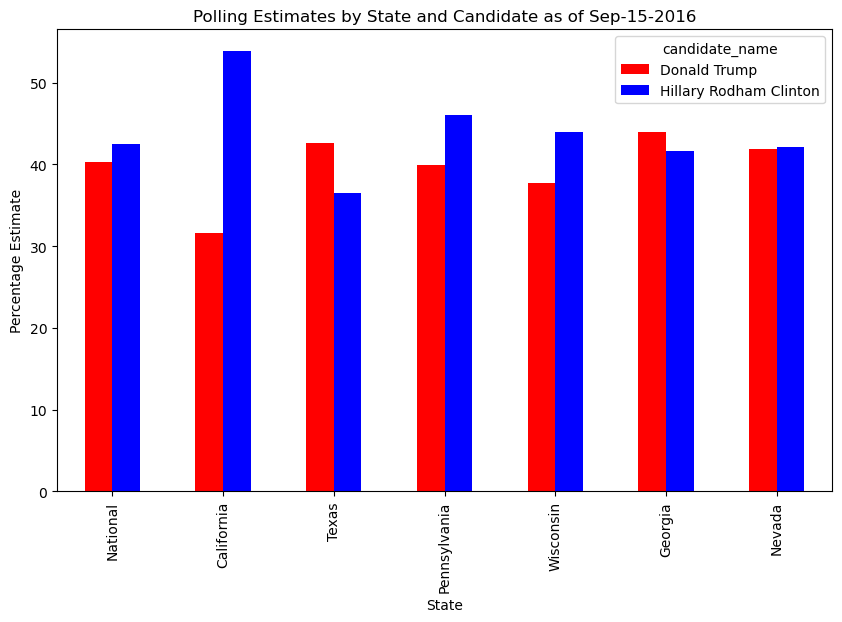

In [51]:
import matplotlib.pyplot as plt

pivot_table.plot(kind='bar', color=['red', 'blue'], figsize=(10, 6))
plt.title('Polling Estimates by State and Candidate as of Sep-15-2016')
plt.xlabel('State')
plt.ylabel('Percentage Estimate')

plt.show()

In [52]:
#July 2016 Intense campaining, significsnt event - Trump Leads in GA :
  # POST PRIMARY UNITY (Republican National Convention 18-21.07 initial boost called ""conventional bump"
 #Pence Introduction - support df conservatives
# Clinton Emali Scandal July 2016 - more swings in states like Nevad
# July - Aug Clinton Growth in Nevada Democratic Convention Bounce (July 25-28) after official nomination 
# Minority Votes in Nevada

#Trump Dip in Nevada - comments about Khan Family in July
# Sep 2016 Debate - strong performance of Clinton
#Focus on National Security (Clinten more convinving as a former Secretary of State)
# Trump critied for inconsistient policies on immigration and foreign policy in Nevada


# mid October Clinton surge 
#"Access Hollywood" tape with Trumps comments about women caused a big drop also in Republican support 
# Debate wins Clinton seen as a winner in all three debates. Her focus on healthcare (Affordable Care Act, Obamacare) key issue for Nevada. Trump lacked alternatives


# october 28 Reopening of Clintons Email Investigation - DRAMATIC SHIFT TOWARDS Trump!!!
#Trump focus on law and order showing concerns pver crime and immigration- surge in Georgia - Republican Base consolidation (esp. in Georgia)
# Early November Race in Nevada very tight - Cliton mobilized her efforts focusing on social justice, haelthcare and economic equality for
#diverse voters in Nevada



In [53]:
# Trump strong appeal among working-class voters in Nevada frustrsted with the political establishment, promises to "drain the swamp"
# Clinton loosing the race due to ongoing investigation 

In [54]:
# conclusion 2016 - the swings in the poling data were driven by the combination of major political events( conventions, 
# debates and FBI investigations), campaign messaging  (healthcare, immigation, etc.) and personal candidates features played 
#singnifncant role in shifting public opiniion, especially in the swing states

In [55]:
# file with actual 2016 from Sandra
import pandas as pd
url = "/Users/alexkabanovsky/Documents/GitHub/Can-Kamala-Win-/df_results_2016.csv"
df_actual2016 = pd.read_csv(url)

In [56]:
import datetime as dt
df['modeldate'] = pd.to_datetime(df['modeldate'])
date = dt.datetime(2016, 9, 15)
index_name = df[df['modeldate'] == date].index

/var/folders/tk/l3rys1j13d714cd0mx1y2mn00000gn/T/ipykernel_49791/80476026.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['modeldate'] = pd.to_datetime(df['modeldate'])


In [57]:
# data for all states for Sept-15-2016

df = df.loc[index_name[0] : index_name[-1]]


In [58]:
# pivot table for all states for Sept-15-2016
pivot_table_sept2016 = pd.pivot_table(df, values='pct_estimate', index='state', columns='candidate_name', aggfunc='mean')

In [59]:
import pandas as pd
url = "/Users/alexkabanovsky/Downloads/presidential_poll_averages_2020.csv"
df2020 = pd.read_csv(url)

In [60]:
import datetime as dt
df2020['modeldate'] = pd.to_datetime(df2020['modeldate'])
date = dt.datetime(2020, 9, 15)
index_name = df2020[df2020['modeldate'] == date].index
index_name

Index([10564, 10565, 10566, 10567, 10568, 10569, 10570, 10571, 10572, 10573,
       ...
       10750, 10751, 10752, 10753, 10754, 10755, 10756, 10757, 10758, 10759],
      dtype='int64', length=196)

In [61]:
df_2020 = df2020.loc[10564:10661]
df2020.drop(['cycle'],  axis =1, inplace=True)

In [62]:
# downloaded a new cvs file from Sandra for 2016
import pandas as pd
url = "/Users/alexkabanovsky/Documents/GitHub/Can-Kamala-Win-/df_results_2016.csv"
df_actual2016 = pd.read_csv(url)

In [63]:
# downloaded a new cvs file from Sandra for 2020
import pandas as pd
url = "/Users/alexkabanovsky/Documents/GitHub/Can-Kamala-Win-/df_results_2020.csv"
df_actual2020 = pd.read_csv(url)
df_actual2020 

,State,Joseph Biden,Donald Trump
0,Alabama,36.57%,62.03%
1,Alaska,42.77%,52.83%
2,Arizona,49.36%,49.06%
3,Arkansas,34.78%,62.40%
4,California,63.48%,34.32%
5,Colorado,55.40%,41.90%
6,Connecticut,59.26%,39.19%
7,Delaware,58.74%,39.77%
8,District of Columbia,92.15%,5.40%
9,Florida,47.86%,51.22%


In [64]:
df_actual2020.loc[33, 'State'] = 'Nevada'
df_actual2020.loc[48, 'State'] = 'Texas'
df_actual2020

,State,Joseph Biden,Donald Trump
0,Alabama,36.57%,62.03%
1,Alaska,42.77%,52.83%
2,Arizona,49.36%,49.06%
3,Arkansas,34.78%,62.40%
4,California,63.48%,34.32%
5,Colorado,55.40%,41.90%
6,Connecticut,59.26%,39.19%
7,Delaware,58.74%,39.77%
8,District of Columbia,92.15%,5.40%
9,Florida,47.86%,51.22%


In [65]:
# Actual elections outcome 2016 (by Sandra)
df_actual2016['Hillary Clinton'] = df_actual2016['Hillary Clinton'].str.replace('%', '')
df_actual2016['Donald Trump'] = df_actual2016['Donald Trump'].str.replace('%', '')

In [66]:
df_actual2016=df_actual2016.set_index("State")

In [67]:
df_actual2016=df_actual2016.rename_axis("state")

In [68]:
merge_df=pd.merge(pivot_table_sept2016, df_actual2016, on="state", how="outer")
merge_df

,Donald Trump_x,Hillary Rodham Clinton,Hillary Clinton,Donald Trump_y
state,,,,
Alabama,60.89035,33.28803,34.36,62.08
Alaska,40.60954,31.24394,36.55,51.28
Arizona,40.99536,38.45897,44.58,48.08
Arkansas,51.54605,33.76751,33.65,60.57
California,31.63804,53.83871,61.73,31.62
...,...,...,...,...
Virginia,38.05962,44.35824,49.73,44.41
Washington,31.67622,43.64548,52.54,36.83
West Virginia,55.76470,29.83181,26.43,68.50


In [69]:
merge_df = merge_df.rename(columns={'Donald Trump_x': 'DT Polls Sept16', 'Hillary Rodham Clinton': 'HC Polls Sept16','Donald Trump_y':'DT Results 2016' ,'Hillary Clinton':'HC Results 2016'})
merge_df

,DT Polls Sept16,HC Polls Sept16,HC Results 2016,DT Results 2016
state,,,,
Alabama,60.89035,33.28803,34.36,62.08
Alaska,40.60954,31.24394,36.55,51.28
Arizona,40.99536,38.45897,44.58,48.08
Arkansas,51.54605,33.76751,33.65,60.57
California,31.63804,53.83871,61.73,31.62
...,...,...,...,...
Virginia,38.05962,44.35824,49.73,44.41
Washington,31.67622,43.64548,52.54,36.83
West Virginia,55.76470,29.83181,26.43,68.50


In [70]:
cols=list(merge_df.columns)
cols[2], cols[3] = cols[3], cols[2]
merge_df= merge_df[cols]

In [71]:
selected_results_2016 = ["Arizona", "Georgia", "Michigan", "Nevada", "North Carolina", "Pennsylvania", "Wisconsin", "California", "Texas","National"]
new_df = merge_df.loc[merge_df.index.isin(selected_results_2016)]

In [72]:
new_df[['DT Polls Sept16', 'HC Polls Sept16']] = new_df[['DT Polls Sept16', 'HC Polls Sept16']].round(2)

/var/folders/tk/l3rys1j13d714cd0mx1y2mn00000gn/T/ipykernel_49791/3435597963.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[['DT Polls Sept16', 'HC Polls Sept16']] = new_df[['DT Polls Sept16', 'HC Polls Sept16']].round(2)


In [73]:
df_actual2020=df_actual2020.set_index("State")

In [74]:
df_actual2020=df_actual2020.rename_axis("state")
df_actual2020['Joseph Biden'] = df_actual2020['Joseph Biden'].str.replace('%', '')

In [75]:
df_actual2020['Donald Trump'] = df_actual2020['Donald Trump'].str.replace('%', '')

In [76]:
pivot_table_sept2020 = pd.pivot_table(df2020, values='pct_estimate', index='state', columns='candidate_name', aggfunc='mean')

In [77]:
pivot_table_sept2020.drop(['Convention Bounce for Donald Trump', 'Convention Bounce for Joseph R. Biden Jr.'],  axis =1, inplace=True)
pivot_table_sept2020

candidate_name,Donald Trump,Joseph R. Biden Jr.
state,,
Alabama,57.884527,38.582396
Alaska,49.474151,44.757079
Arizona,45.070870,47.977860
Arkansas,48.988443,43.460319
California,32.462345,60.831036
Colorado,40.617719,51.293515
Connecticut,34.688671,54.073040
Delaware,39.152458,56.446041
District of Columbia,8.909208,87.095839


In [102]:
merge_df2=pd.merge(pivot_table_sept2020, df_actual2020, on="state", how="outer")

,Donald Trump_x,Joseph R. Biden Jr.,Joseph Biden,Donald Trump_y
state,,,,
Alabama,57.884527,38.582396,36.57,62.03
Alaska,49.474151,44.757079,42.77,52.83
Arizona,45.070870,47.977860,49.36,49.06
Arkansas,48.988443,43.460319,34.78,62.40
California,32.462345,60.831036,63.48,34.32
...,...,...,...,...
Virginia,41.624220,49.921833,54.11,44.00
Washington,34.982658,57.770589,57.97,38.77
West Virginia,64.774526,31.998966,29.69,68.62


In [104]:
merge_df2 = merge_df2.rename(columns={'Donald Trump_x': 'DT Polls Sept20', 'Joseph R. Biden Jr.': 'JB Polls Sept20','Joseph Biden':'JB Results 2020','Donald Trump_y':'DT Results 2020'})

,DT Polls Sept20,JB Polls Sept20,JB Results 2020,DT Results 2020
state,,,,
Alabama,57.884527,38.582396,36.57,62.03
Alaska,49.474151,44.757079,42.77,52.83
Arizona,45.070870,47.977860,49.36,49.06
Arkansas,48.988443,43.460319,34.78,62.40
California,32.462345,60.831036,63.48,34.32
...,...,...,...,...
Virginia,41.624220,49.921833,54.11,44.00
Washington,34.982658,57.770589,57.97,38.77
West Virginia,64.774526,31.998966,29.69,68.62


In [106]:
merge_df2.rename(columns={'Joseph R. Biden Jr.':'JB Polls Sept20'}, inplace=True)
merge_df2

,DT Polls Sept20,JB Polls Sept20,JB Results 2020,DT Results 2020
state,,,,
Alabama,57.884527,38.582396,36.57,62.03
Alaska,49.474151,44.757079,42.77,52.83
Arizona,45.070870,47.977860,49.36,49.06
Arkansas,48.988443,43.460319,34.78,62.40
California,32.462345,60.831036,63.48,34.32
...,...,...,...,...
Virginia,41.624220,49.921833,54.11,44.00
Washington,34.982658,57.770589,57.97,38.77
West Virginia,64.774526,31.998966,29.69,68.62


In [108]:
cols=list(merge_df2.columns)
cols[2], cols[3] = cols[3], cols[2]
merge_df2= merge_df2[cols]

In [110]:
selected_results_2020 = ["Arizona", "Georgia", "Michigan", "Nevada", "North Carolina", "Pennsylvania", "Wisconsin", "California", "Texas","National"]
new_df2 = merge_df2.loc[merge_df2.index.isin(selected_results_2016)]
new_df2

,DT Polls Sept20,JB Polls Sept20,DT Results 2020,JB Results 2020
state,,,,
Arizona,45.070870,47.977860,49.06,49.36
California,32.462345,60.831036,34.32,63.48
Georgia,46.990641,46.163801,49.24,49.47
Michigan,42.563814,49.359055,47.84,50.62
National,42.903195,50.222745,46.85,51.31
Nevada,42.182717,47.284393,47.67,50.06
North Carolina,45.948872,47.987714,49.93,48.59
Pennsylvania,44.203126,49.043439,48.69,49.85
Texas,47.986360,45.907733,52.06,46.48


In [112]:
new_df2[['DT Polls Sept20', 'JB Polls Sept20']] = new_df2[['DT Polls Sept20', 'JB Polls Sept20']].round(2)
new_df2

/var/folders/tk/l3rys1j13d714cd0mx1y2mn00000gn/T/ipykernel_49791/146053961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df2[['DT Polls Sept20', 'JB Polls Sept20']] = new_df2[['DT Polls Sept20', 'JB Polls Sept20']].round(2)


,DT Polls Sept20,JB Polls Sept20,DT Results 2020,JB Results 2020
state,,,,
Arizona,45.07,47.98,49.06,49.36
California,32.46,60.83,34.32,63.48
Georgia,46.99,46.16,49.24,49.47
Michigan,42.56,49.36,47.84,50.62
National,42.90,50.22,46.85,51.31
Nevada,42.18,47.28,47.67,50.06
North Carolina,45.95,47.99,49.93,48.59
Pennsylvania,44.20,49.04,48.69,49.85
Texas,47.99,45.91,52.06,46.48


In [114]:
new_df2.to_csv('new_df2.csv')


In [118]:
final_2020 = new_df2
final_2020

,DT Polls Sept20,JB Polls Sept20,DT Results 2020,JB Results 2020
state,,,,
Arizona,45.07,47.98,49.06,49.36
California,32.46,60.83,34.32,63.48
Georgia,46.99,46.16,49.24,49.47
Michigan,42.56,49.36,47.84,50.62
National,42.90,50.22,46.85,51.31
Nevada,42.18,47.28,47.67,50.06
North Carolina,45.95,47.99,49.93,48.59
Pennsylvania,44.20,49.04,48.69,49.85
Texas,47.99,45.91,52.06,46.48


In [ ]:
final_2020.to_csv('final_2020.csv')